In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# Read specific sheet
df = pd.read_excel("AutoMPGmodels.xlsx", sheet_name="AutoMPG")

In [4]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

In [6]:
df.isnull().sum()

GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64

In [7]:
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in the 'Transmission' column
df['Name'] = label_encoder.fit_transform(df['Name'])

In [8]:
df['GallonsPer100MilesTo1981'] = pd.to_numeric(df['GallonsPer100MilesTo1981'], errors='coerce')
median_value = df['GallonsPer100MilesTo1981'].median()
df['GallonsPer100MilesTo1981'].fillna(median_value, inplace=True)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_19048\2116088702.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GallonsPer100MilesTo1981'].fillna(median_value, inplace=True)


In [9]:
df.isnull().sum()

GallonsPer100Miles          0
GallonsPer100MilesTo1981    0
MPG                         0
Cylinders                   0
Displacement100ci           0
Horsepower100               0
Weight1000lb                0
Seconds0to60                0
Year                        0
Year70To81                  0
Origin                      0
Origin.Eq.1                 0
Origin.Eq.2                 0
Origin.Eq.3                 0
Name                        0
dtype: int64

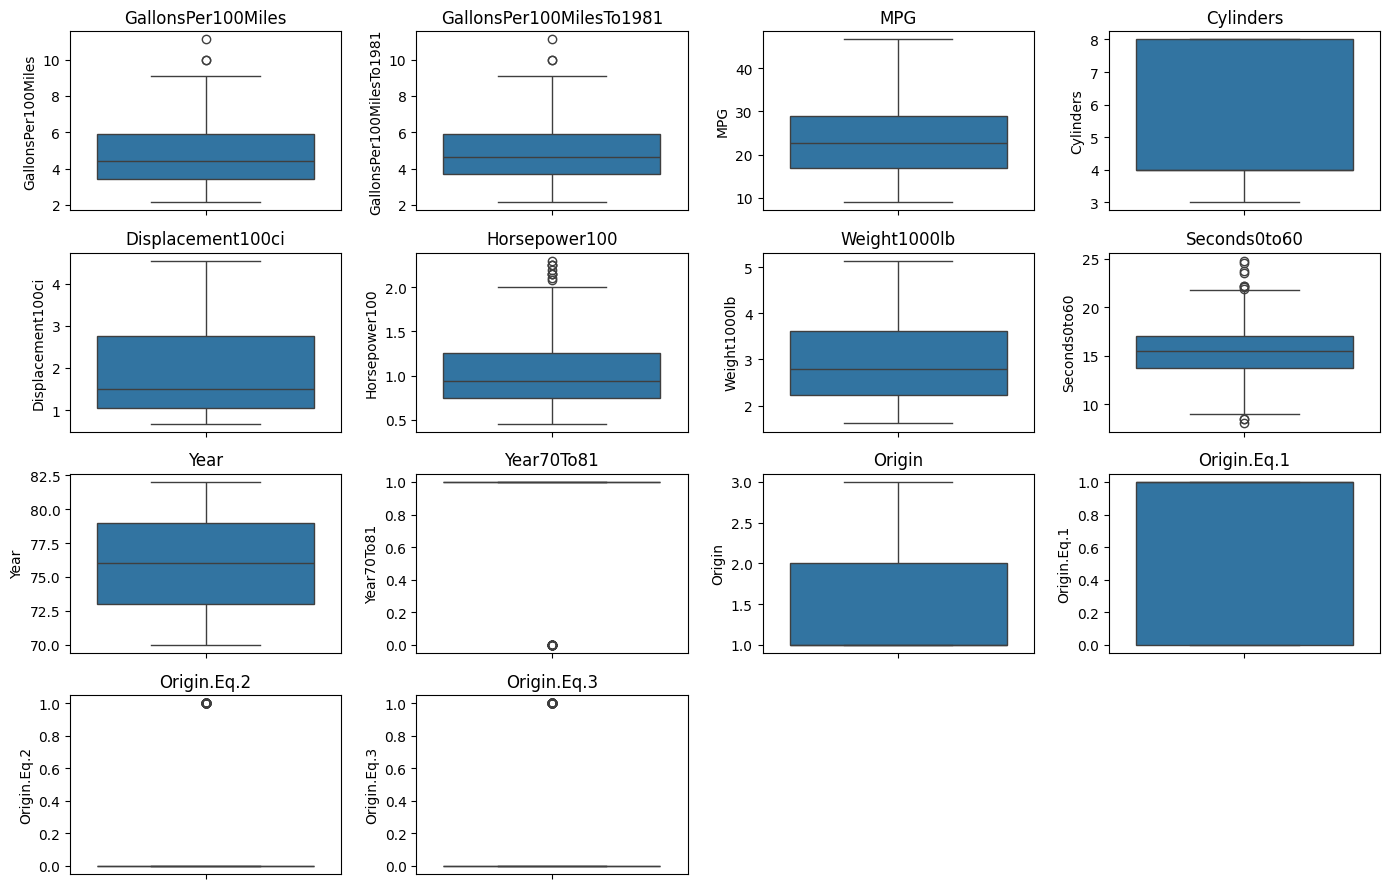

In [10]:
plt.figure(figsize=(14,9))

plt.subplot(4,4,1)
sns.boxplot(df['GallonsPer100Miles'])
plt.title('GallonsPer100Miles')

plt.subplot(4,4,2)
sns.boxplot(df['GallonsPer100MilesTo1981'])
plt.title('GallonsPer100MilesTo1981')

plt.subplot(4,4,3)
sns.boxplot(df['MPG'])
plt.title('MPG')

plt.subplot(4,4,4)
sns.boxplot(df['Cylinders'])
plt.title('Cylinders')

plt.subplot(4,4,5)
sns.boxplot(df['Displacement100ci'])
plt.title('Displacement100ci')

plt.subplot(4,4,6)
sns.boxplot(df['Horsepower100'])
plt.title('Horsepower100')

plt.subplot(4,4,7)
sns.boxplot(df['Weight1000lb'])
plt.title('Weight1000lb')

plt.subplot(4,4,8)
sns.boxplot(df['Seconds0to60'])
plt.title('Seconds0to60')

plt.subplot(4,4,9)
sns.boxplot(df['Year'])
plt.title('Year')

plt.subplot(4,4,10)
sns.boxplot(df['Year70To81'])
plt.title('Year70To81')

plt.subplot(4,4,11)
sns.boxplot(df['Origin'])
plt.title('Origin')

plt.subplot(4,4,12)
sns.boxplot(df['Origin.Eq.1'])
plt.title('Origin.Eq.1')

plt.subplot(4,4,13)
sns.boxplot(df['Origin.Eq.2'])
plt.title('Origin.Eq.2')

plt.subplot(4,4,14)
sns.boxplot(df['Origin.Eq.3'])
plt.title('Origin.Eq.3')

plt.tight_layout()
plt.show()

In [11]:
df.corr()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
GallonsPer100Miles,1.000000,0.969012,-0.935935,0.839385,0.866050,0.854809,0.885056,-0.456338,-0.558255,0.272419,-0.532932,0.546366,-0.264829,-0.409405,-0.243667
GallonsPer100MilesTo1981,0.969012,1.000000,-0.883338,0.820716,0.854735,0.843147,0.871405,-0.449583,-0.468866,0.043607,-0.533528,0.556667,-0.289903,-0.398169,-0.239432
MPG,-0.935935,-0.883338,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.315908,0.565209,-0.565161,0.244313,0.451454,0.265624
Cylinders,0.839385,0.820716,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.214933,-0.568932,0.610494,-0.352324,-0.404209,-0.275424
Displacement100ci,0.866050,0.854735,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.182566,-0.614535,0.655936,-0.371633,-0.440825,-0.289067
Horsepower100,0.854809,0.843147,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.172258,-0.455171,0.489625,-0.284948,-0.321936,-0.233369
Weight1000lb,0.885056,0.871405,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.184409,-0.585005,0.600978,-0.293841,-0.447929,-0.249398
Seconds0to60,-0.456338,-0.449583,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.101206,0.212746,-0.258224,0.208298,0.115020,0.134302
Year,-0.558255,-0.468866,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.471084,0.181528,-0.136065,-0.037745,0.199841,0.075379
Year70To81,0.272419,0.043607,-0.315908,0.214933,0.182566,0.172258,0.184409,-0.101206,-0.471084,1.000000,-0.032254,-0.004955,0.081198,-0.070666,-0.019373


In [12]:
X = df.drop(['MPG'], axis=1)
y = df['MPG']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

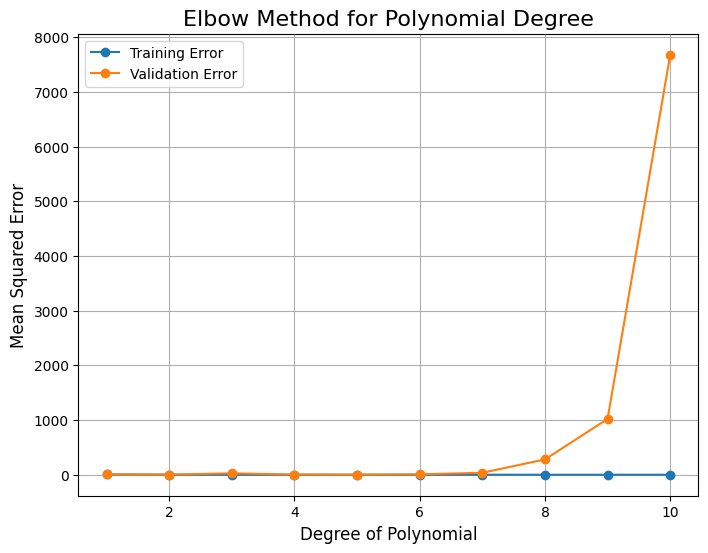

Optimal Polynomial Degree: 5


In [18]:
train_errors = []
val_errors = []

degrees = range(1, 11)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_poly_train)))
    val_errors.append(mean_squared_error(y_test, model.predict(X_poly_test)))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, val_errors, label="Validation Error", marker='o')
plt.title("Elbow Method for Polynomial Degree", fontsize=16)
plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Identify the optimal degree (elbow point)
optimal_degree = np.argmin(val_errors) + 1
print(f"Optimal Polynomial Degree: {optimal_degree}")

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [22]:
poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [23]:
y_pred = lin.predict(X_test_poly)

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.5320676182313391

In [25]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

7.472782785613026e-14